In [1]:
import pandas as pd

In [3]:
base_risco_credito = pd.read_csv('risco_credito.csv')
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


Uso do Naive Bayes

## Pré processamento:

In [4]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()


In [7]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [8]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [9]:
import pickle
with open('risco_credito.pkl', mode='wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [12]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
#história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2,0,0,0]])

In [13]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [14]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [15]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [16]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Árvore de decisao

In [10]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pickle

In [4]:
with open('risco_credito.pkl', mode='rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [5]:
X_risco_credito, y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [6]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [7]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

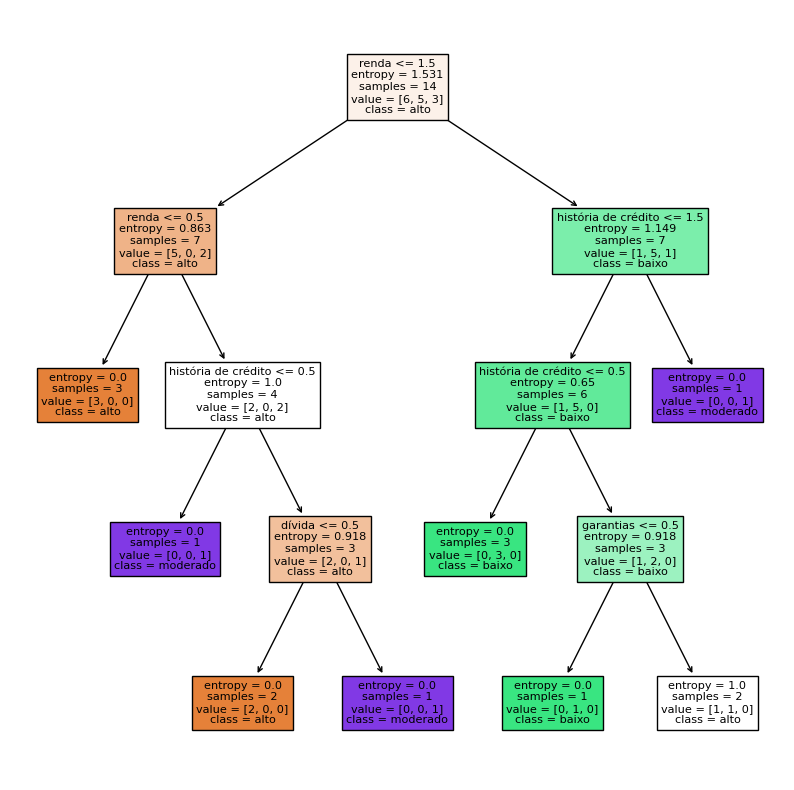

In [14]:
from sklearn import tree
previsores = ['história de crédito', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, 
               class_names=arvore_risco_credito.classes_,
               filled=True);

In [15]:
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
import matplotlib.pyplot as plt
import pickle